In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from matplotlib import animation


In [32]:
def charge_color(c):
    if c>0:
        return 'red'
    elif c<0:
        return 'blue'
    else:
        return 'gray'
    
df = pd.read_csv("output.txt", sep=" ", header=None)

df = df[1:]

print(df[0][1])

0:


In [26]:

x = 0
values = []



for i in range(len(df[1])):
    if int(df[0][i].replace(':',''))+1 > len(values):
        values.append([])
    
    values[int(df[0][i].replace(':',''))].append(df[1][i].replace('(','').replace(')','').split(','))
    

print(len(values))
for i in range(len(values)):
    for j in range(len(values[i])):
        for k in range(len(values[i][j])):
            values[i][j][k] = float(values[i][j][k])


charges = [int(i) for i in df[2][0:len(values)]]
print(charges)

KeyError: 0

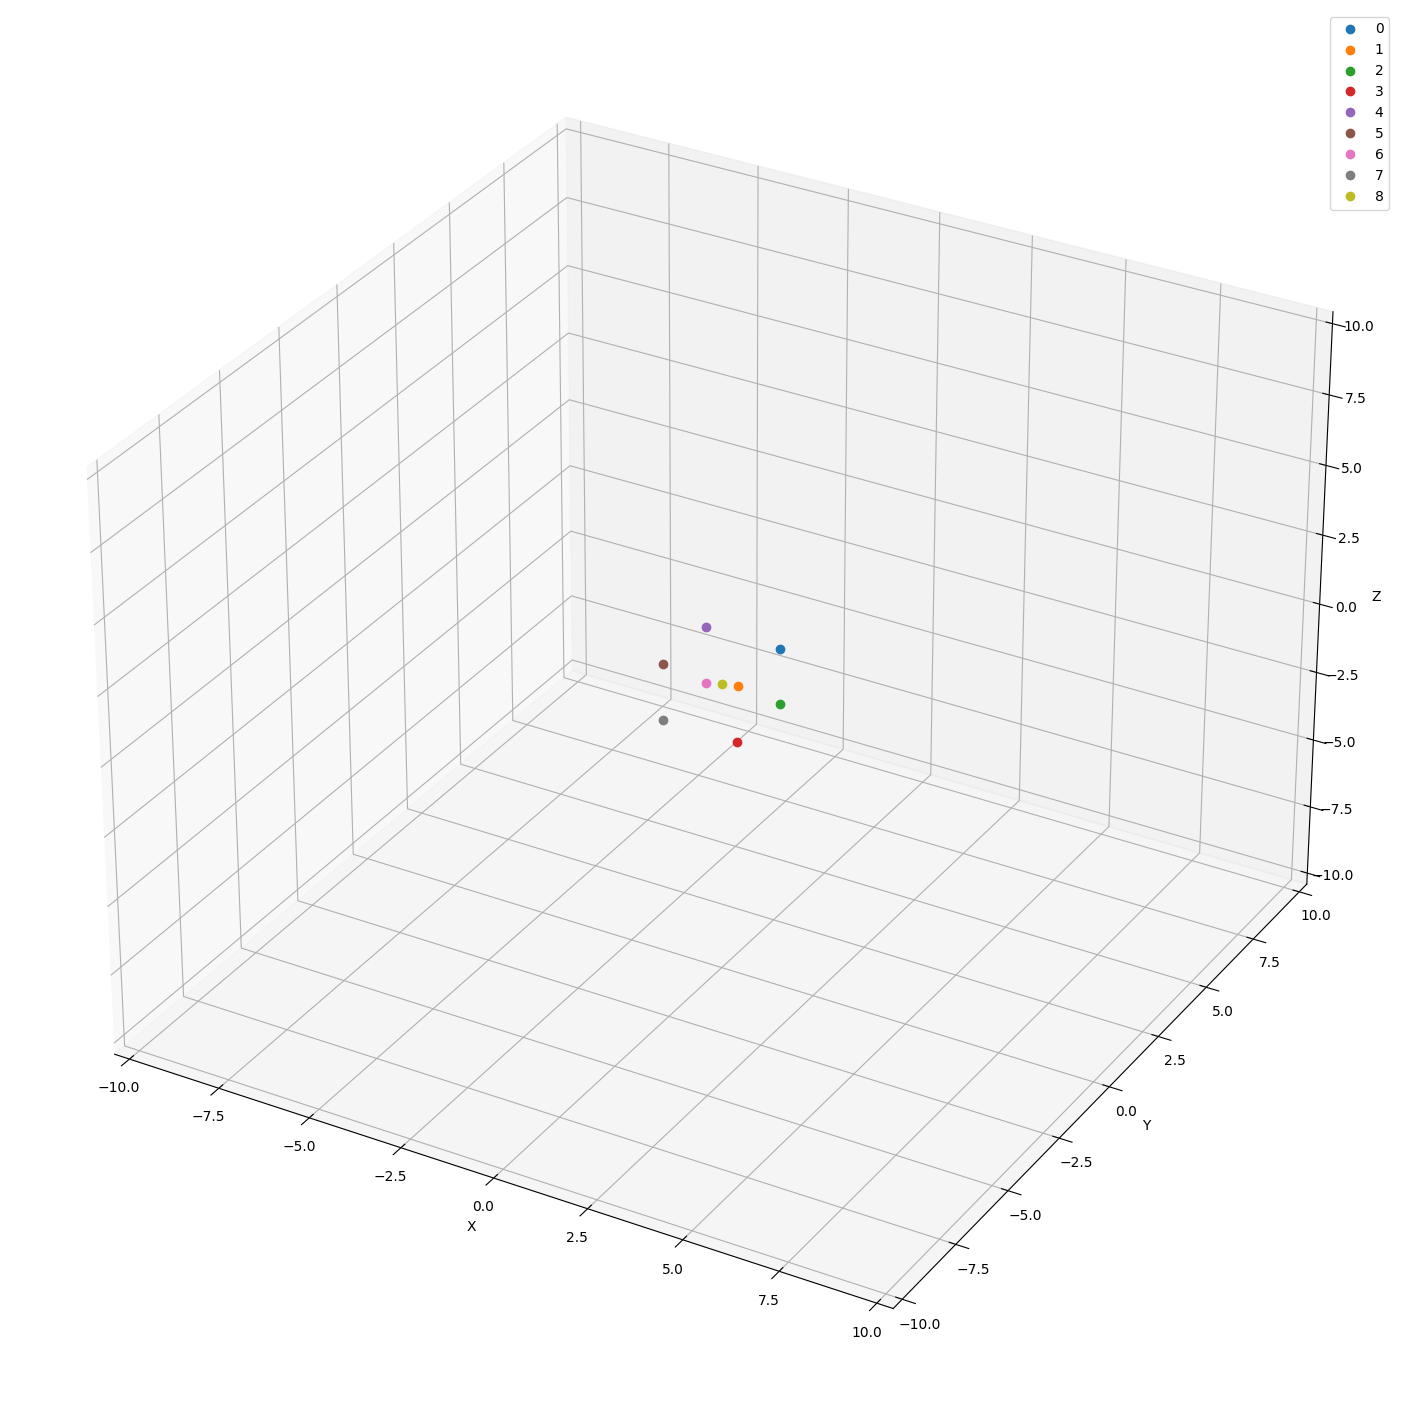

C:\Users\atheri\AppData\Local\Temp\ipykernel_13400\132225061.py:19: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p.set_data(np.array([values[i][n][0],values[i][n][1]]))


ValueError: unknown file extension: 

In [5]:

fig = plt.figure(figsize=(24,18))
ax = fig.add_subplot(projection='3d')

points = [ax.plot([values[i][0][0]], [values[i][0][1]], [values[i][0][2]], 'o', color=charge_color(charges[i]), label='{}'.format(i)) for i in range(len(values))]
plt.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim((-10,10))
ax.set_ylim((-10,10)) 
ax.set_zlim((-10,10))


def update_point(n, values, points):
    for i in range(len(points)):
        if n < len(values[i]):
            p, = points[i]
            p.set_data(np.array([values[i][n][0],values[i][n][1]]))
            p.set_3d_properties(values[i][n][2], 'z')

    return points

ani=animation.FuncAnimation(fig, update_point, max([len(i) for i in values]), fargs=(values, points))

plt.show()
ani.save(sys.argv[2], writer='pillow')



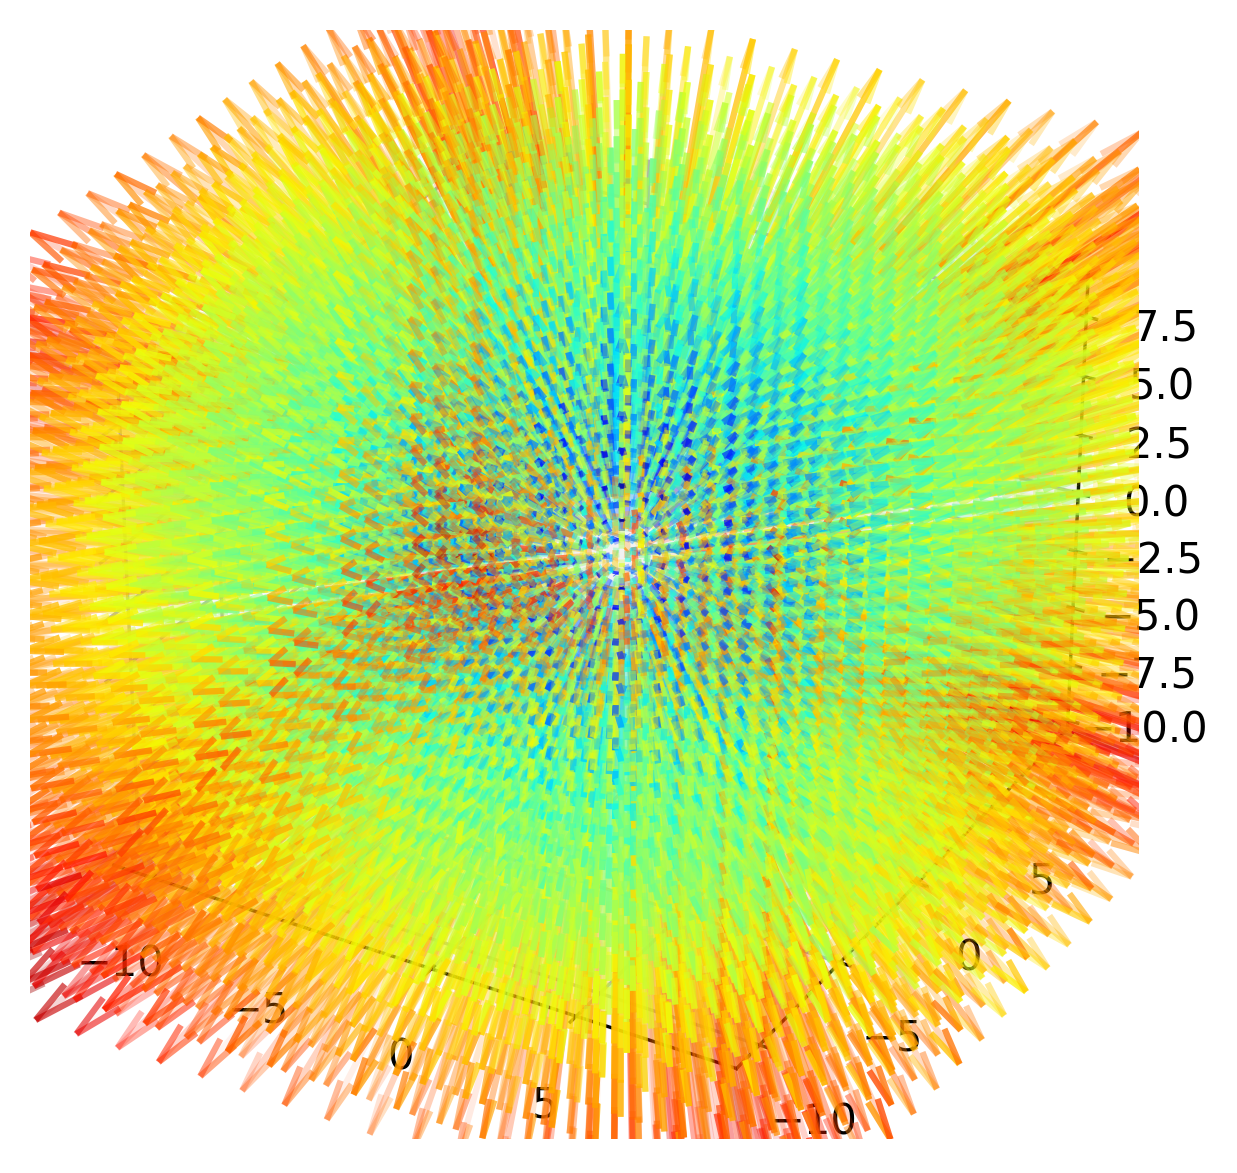

In [13]:
def plot_3d_quiver(x, y, z, u, v, w):
    c = np.sqrt(np.abs(v)**2 + np.abs(u)**2 + np.abs(w)**2)
    length = np.repeat(((c - c.min())/(c.max() - c.min())).ravel(), 3)
    c = (c.ravel() - c.min())/c.ptp()
    c = np.concatenate((c, np.repeat(c, 2)))
    c = plt.cm.jet(c)

    c[:, -1] = 1 - length

    fig = plt.figure(dpi = 300)
    ax = fig.add_subplot(projection = '3d')
    ax.quiver(x, y, z, u, v, w, colors = c, length = .5, arrow_length_ratio = 0.2, cmap = plt.cm.jet)
    


x, y, z = np.meshgrid(np.arange(-10, 10, 1),
                      np.arange(-10, 10, 1),
                      np.arange(-10, 10, 1))
u = x
v = y
w = z

plot_3d_quiver(x, y, z, u, v, w)

plt.show()